In [2]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [4]:
n=100

In [5]:
x = torch.ones(n,2) #create an n x 2 tensor of ones
x[:,0].uniform_(-1.,1) #uniform distribution between -1 to 1 of first column of x
x[:5]

tensor([[-0.3260,  1.0000],
        [-0.4766,  1.0000],
        [-0.3762,  1.0000],
        [-0.1140,  1.0000],
        [ 0.7951,  1.0000]])

In [4]:
x.shape

torch.Size([100, 2])

In [5]:
type(x)

torch.Tensor

In [6]:
a = tensor(3.,2); a # set the parameters of y for: a and b for the line of best fit finding of ax+b =y

tensor([3., 2.])

In [11]:
a.shape

torch.Size([2])

In [7]:
y = x@a

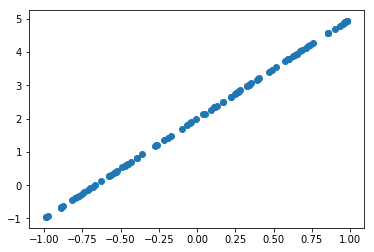

In [10]:
plt.scatter(x[:,0], y);

In [8]:
y = x@a + torch.rand(n)

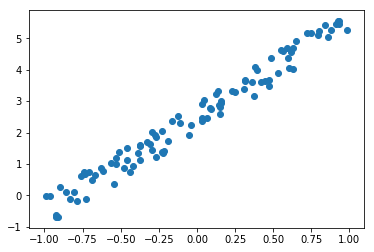

In [9]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [10]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [11]:
a = tensor(-1.,1)

In [12]:
y_hat = x@a
e = mse(y_hat, y)
e

tensor(7.3756)

In [19]:
type(e)

torch.Tensor

In [20]:
e.type()

'torch.FloatTensor'

In [9]:
a.type()

'torch.FloatTensor'

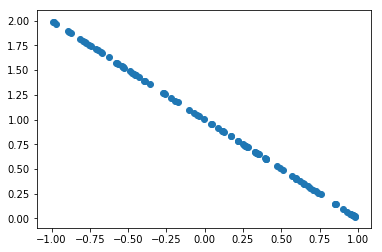

In [22]:
plt.scatter(x[:,0],y_hat);

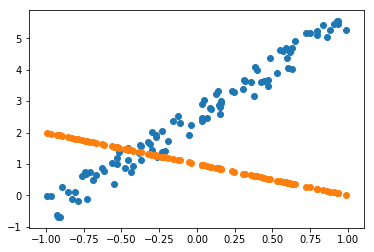

In [18]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat); # the ; avoids plotting of collection address

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [14]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [15]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward() #takes calculates all the gradients, store at a.grad?
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [16]:
lr = 1e-1
for t in range(100): update() #forloop to run update

tensor(7.3756, grad_fn=<MeanBackward0>)
tensor(1.5745, grad_fn=<MeanBackward0>)
tensor(0.4954, grad_fn=<MeanBackward0>)
tensor(0.2007, grad_fn=<MeanBackward0>)
tensor(0.1185, grad_fn=<MeanBackward0>)
tensor(0.0956, grad_fn=<MeanBackward0>)
tensor(0.0892, grad_fn=<MeanBackward0>)
tensor(0.0874, grad_fn=<MeanBackward0>)
tensor(0.0869, grad_fn=<MeanBackward0>)
tensor(0.0868, grad_fn=<MeanBackward0>)


In [17]:
a

Parameter containing:
tensor([3.0646, 2.5610], requires_grad=True)

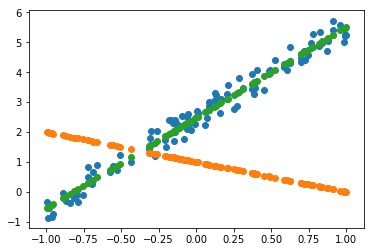

In [18]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], y_hat);
plt.scatter(x[:,0],x@a);

## Animate it!

In [19]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [22]:
a = nn.Parameter(tensor(-1.,1)) #feeding a guess again

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange') #plots the scatter data points
line, = plt.plot(x[:,0], x@a)
plt.close()##??

def animate(i):
    update()
    line.set_ydata(x@a)
    return line

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In [28]:
type(line)

matplotlib.lines.Line2D

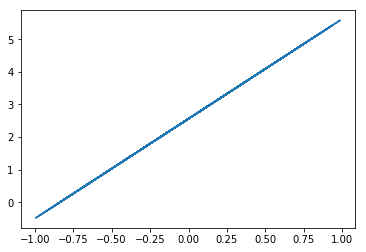

In [25]:
lines = plt.plot(x[:,0], x@a)

In [26]:
type(lines)

list

In [27]:
lines

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.